# This Notebook will concentrate on how to use multiple indices in remote sensing for vegetation mapping

***

## The indices we will be looking at includes: 

### -NDVI = [Normalized difference vegetation index](https://gisgeography.com/ndvi-normalized-difference-vegetation-index/)
### -NDWI = [Normalized difference water index](http://edo.jrc.ec.europa.eu/documents/factsheets/factsheet_ndwi.pdf)

***
## Index Algorithms:

![NDVI Image](http://www.scielo.org.za/img/revistas/sajs/v109n3-4/090x01a03.jpg)

***
# *Sentinel-2 Band Combonations*

## - RED = 5
## - NIR = 7
## - SWIR = 12


C:\Users\hannes\AppData\Local\Continuum\anaconda\lib\site-packages\rasterio\__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


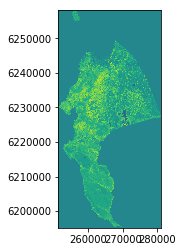

It took:  0:00:58.219046 to run


In [1]:
import rasterio
import numpy as np
import glob
from datetime import datetime
from rasterio.plot import show
%matplotlib inline

# If you want to see how long it takes to run this script
startTime = datetime.now()

# Folder Structure used in this Project
image_folder = "images/*.tif"
ndvi_folder = 'images/ndvi/'
ndwi_folder = 'images/ndwi/'

# Open the image folder, count the amount of imagery to be used in the range function
images = glob.glob(image_folder)

rng = len(images)

# Indices Function
def indices_calc(red,nir,swir):
    
    # Loop through all the imagery
    for i in range(0,rng):
        image_file = images[i]
        
        # Band Selection
        with rasterio.open(image_file) as src: 
            band_red = src.read(red) 
            band_nir = src.read(nir)
            band_swir = src.read(swir)

        np.seterr(divide = 'ignore', invalid='ignore')

        # NDVI & NDWI Calculation
        ndvi = (band_nir.astype(float) - band_red.astype(float))/ (band_nir + band_red)
        ndwi = (band_swir.astype(float) - band_nir.astype(float))/ (band_swir + band_nir)

        # Metadata
        kwargs = src.meta
        kwargs.update(dtype=rasterio.float32, count=1)
                
        # Saving the NDVI & NDWI images
        file_name = image_file[7:-4]
        with rasterio.open(ndvi_folder+file_name+'_ndvi.tif','w',**kwargs) as dst:
            dst.write_band(1, ndvi.astype(rasterio.float32))
            
        with rasterio.open(ndwi_folder+file_name+'_ndwi.tif','w',**kwargs) as dst:
            dst.write_band(1, ndwi.astype(rasterio.float32))

# Sentinel Band Combos: Red = 5, NIR = 7, SWIR = 12
indices_calc(5,7,12)

ndvi_images = glob.glob('images/ndvi/*.tif')
example_raster = rasterio.open(ndvi_images[0])

show((example_raster,1))
# To See how long it takes for the script to run
print('It took: ', datetime.now() - startTime,  'to run')